In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
# Scaler 
# Data preparation

bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target
n_samples, n_features = X.shape   # column is the number of features
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)



sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32)).view(-1,1)
y_test = torch.from_numpy(y_test.astype(np.float32)).view(-1,1)

print(X_train.shape,X_train.ndim)
print(y_train.shape,y_train.ndim)

print(X_test.shape,X_test.ndim)
print(y_test.shape,y_test.ndim)




torch.Size([455, 30]) 2
torch.Size([455, 1]) 2
torch.Size([114, 30]) 2
torch.Size([114, 1]) 2


Use Existing Shape: y_train.shape[0] gets the size of the first dimension (number of rows) from y_train.

Reshape with view(y_train.shape[0], 1):
    Here, y_train.shape[0] is explicitly specifying the number of rows.
    1 again specifies that we want the second dimension to have a size of 1.
    If y_train already had 100 rows after the first reshape, this line doesn't change the shape; it just reaffirms it, explicitly setting the shape to (100, 1).

In [3]:
# build model class
class LogisticRegression(nn.Module):
    def __init__(self,n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features,1)
    def forward(self,x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

In [4]:
model = LogisticRegression(n_features)
loss_fcn = nn.BCELoss()
Learning_rate = 0.01 
optimizer = torch.optim.SGD(model.parameters(),lr=Learning_rate)
#model.state_dict()

In [15]:
def accuracy(y_true,y_pred):
    correct = torch.eq(y_true,torch.round(y_pred)).sum().item()
    acc = (correct/len(y_pred)) * 100 
    return acc

In [38]:
# training loop
epochs = 100
epoch_count = []
train_loss = []
Test_loss = [] 

for epoch in range(epochs):
    
    y_pred = model(X_train)
    loss = loss_fcn(y_pred,y_train)
    acc = accuracy(y_train,y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fcn(test_pred,y_test)  
        test_acc = accuracy(y_test,test_pred)
    
    if (epoch - 1) % 10 == 0:
        print(f"epoch: {epoch - 1}, | loss: {loss.item():.4f}, | train_accuracy:{acc:.2f}%, | test_accuracy:{test_acc:.2f}%") 
        epoch_count.append(epoch)
        train_loss.append(loss)
        Test_loss.append(test_loss)
        


epoch: 0, | loss: 0.0676, | train_accuracy:98.46%, | test_accuracy:95.61%
epoch: 10, | loss: 0.0675, | train_accuracy:98.46%, | test_accuracy:95.61%
epoch: 20, | loss: 0.0674, | train_accuracy:98.46%, | test_accuracy:95.61%
epoch: 30, | loss: 0.0673, | train_accuracy:98.46%, | test_accuracy:95.61%
epoch: 40, | loss: 0.0672, | train_accuracy:98.46%, | test_accuracy:95.61%
epoch: 50, | loss: 0.0671, | train_accuracy:98.46%, | test_accuracy:95.61%
epoch: 60, | loss: 0.0670, | train_accuracy:98.46%, | test_accuracy:95.61%
epoch: 70, | loss: 0.0669, | train_accuracy:98.46%, | test_accuracy:95.61%
epoch: 80, | loss: 0.0668, | train_accuracy:98.46%, | test_accuracy:95.61%
epoch: 90, | loss: 0.0667, | train_accuracy:98.46%, | test_accuracy:95.61%


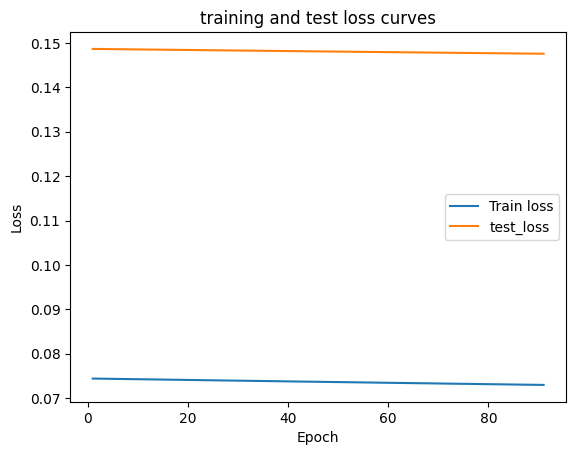

In [33]:
plt.plot(epoch_count,np.array(torch.tensor(train_loss).cpu().numpy()),label="Train loss")
plt.plot(epoch_count,np.array(torch.tensor(Test_loss).cpu().numpy()),label="test_loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [ ]:
with torch.inference_mode():
        y_pred = model(X_test)
        y_pred_cls = y_pred.round()
        acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
        print(acc)

tensor(0.9474)
